In [104]:
import matplotlib.pyplot as plt
import numpy as np

path = "/Users/gexin/Downloads/0103_2.txt"
gw_tmst = []
gw_time = []
gw_tmms = []

def go(s):
    ret = 0
    ret += int(s[0])*10*3600*1000000
    ret += int(s[1])*3600*1000000
    ret += int(s[3])*600*1000000
    ret += int(s[4])*60*1000000
    ret += int(s[6])*10*1000000
    ret += int(s[7])*1000000
    ret += int(s[9])*100000
    ret += int(s[10])*10000
    ret += int(s[11])*1000
    ret += int(s[12])*100
    ret += int(s[13])*10
    ret += int(s[14])
    return ret;

gw = open(path,"r")
for line in gw:
    idx = line.find("JSON up: {\"rxpk\"")
    if idx != -1:
        idx1 = line.find("tmst")
        idx2 = line.find("time")
        idx3 = line.find("tmms")
        #print(line[idx1+6:idx2-2])
        #print(line[idx2+18:idx2+33])
        #print(line[idx3+6:idx3+19])
        #print(str(go(line[idx2+18:idx2+33]))
       
        gw_tmst.append(int(line[idx1+6:idx2-2]))
        gw_tmms.append(int(line[idx3+6:idx3+19]))
        gw_time.append(go(line[idx2+18:idx2+33]))
        

In [105]:
def compare(data1, data2, name1, name2): 
    
    #draw pic
    N = len(data1)
    x = data1
    y = data2
    plt.figure(figsize=(12, 8), dpi=150) 
    plt.xlabel(name1)  
    plt.ylabel(name2)  
    plt.title(name1+" + "+name2)
    plt.plot(x,y,'.')  
    #plt.plot(x,matlab_1_error,"+",label="matlab error")  
    plt.grid(True)    
    plt.show()  
    
    slop = []
    sum = 0.0
    avr_slop = 0.0
    max_slop = -1.0
    min_slop = 99999999.0;
    
    if name1=="tmst" and name2=="time":
        avr_slop = 1.0
    elif name1=="tmst" and name2=="tmms":
        avr_slop = 0.001
    elif name1=="time" and name2=="tmms":
        avr_slop = 0.001
    
    for i in range(1, N):
        p = 1.0* (data2[i]-data2[i-1])/(data1[i]-data1[i-1])
        max_slop = max(max_slop, p)
        if p>0:
            min_slop = min(min_slop, p)
        slop.append(p)
        sum += p;
    #avr_slop = 1.0*sum/(N-1)
    print(name1+"为X "+ name2+"为Y")
    print("avr slop = " + str(avr_slop))
    print("max slop = " + str(max_slop))
    print("min slop = " + str(min_slop))
    print("最坏情况下，每秒同步一次造成的误差如下")      
    if(name1 == "tmst" and name2 == "time"):
        big =   1000000*(max_slop-avr_slop)
        small = 1000000*(min_slop-avr_slop)
        print("对 "+name2+" 的影响为" + str(big/1000)+" ms/ "+str(small/1000)+" ms")
    elif name1=="tmst" and name2=="tmms":
        big = 1000000*(max_slop-avr_slop)
        small = 1000000*(min_slop-avr_slop)
        print("对 "+name2+" 的影响为" + str(big)+" ms/ "+str(small)+" ms")
    elif name1=="time" and name2=="tmms":
        big = 1000000*(max_slop-avr_slop)
        small = 1000000*(min_slop-avr_slop)
        print("对 "+name2+" 的影响为" + str(big)+" ms/ "+str(small)+" ms")
    print()
    
    all = 497
    err = []
    point = 0
    time_range = 1000
    for i in slop:
        u = 0
        if name2 == "time":
            u = 1000000*(i - avr_slop)
        else:
            u = 1000000000*(i - avr_slop)
        if u < time_range and u>-1*time_range:
            err.append(u)
        else:
            point+=1
    print("去除异常点后，采样数量百分比 = " + str(len(err)/all*100.0) + "%")
    
    
    plt.title(name1+" + "+name2+ " error distribution(us)")
    n, bins, patches = plt.hist(err, bins=20, edgecolor='None',facecolor='red')  
    plt.figure(figsize=(12, 8), dpi=120)
    plt.show()

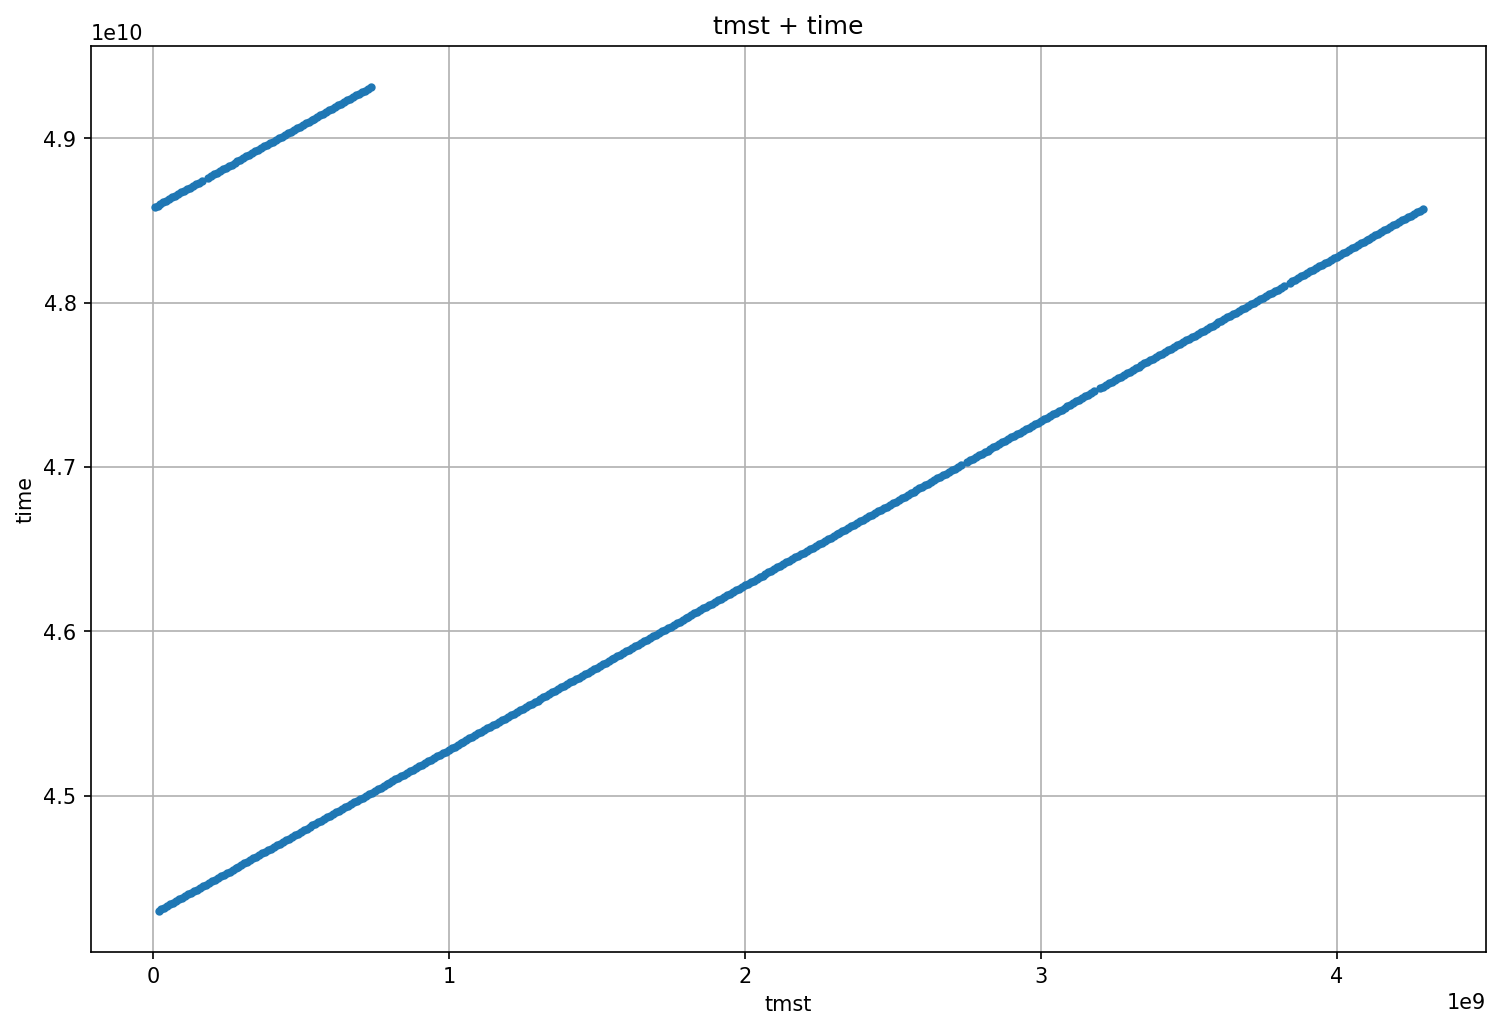

tmst为X time为Y
avr slop = 1.0
max slop = 1.0517345360804133
min slop = 0.9111464014513971
最坏情况下，每秒同步一次造成的误差如下
对 time 的影响为51.734536080413335 ms/ -88.85359854860286 ms

去除异常点后，采样数量百分比 = 90.74446680080483%


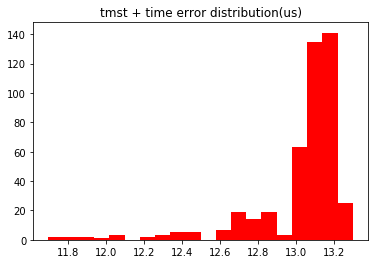

<Figure size 1440x960 with 0 Axes>

In [106]:
compare(gw_tmst, gw_time, "tmst", "time")

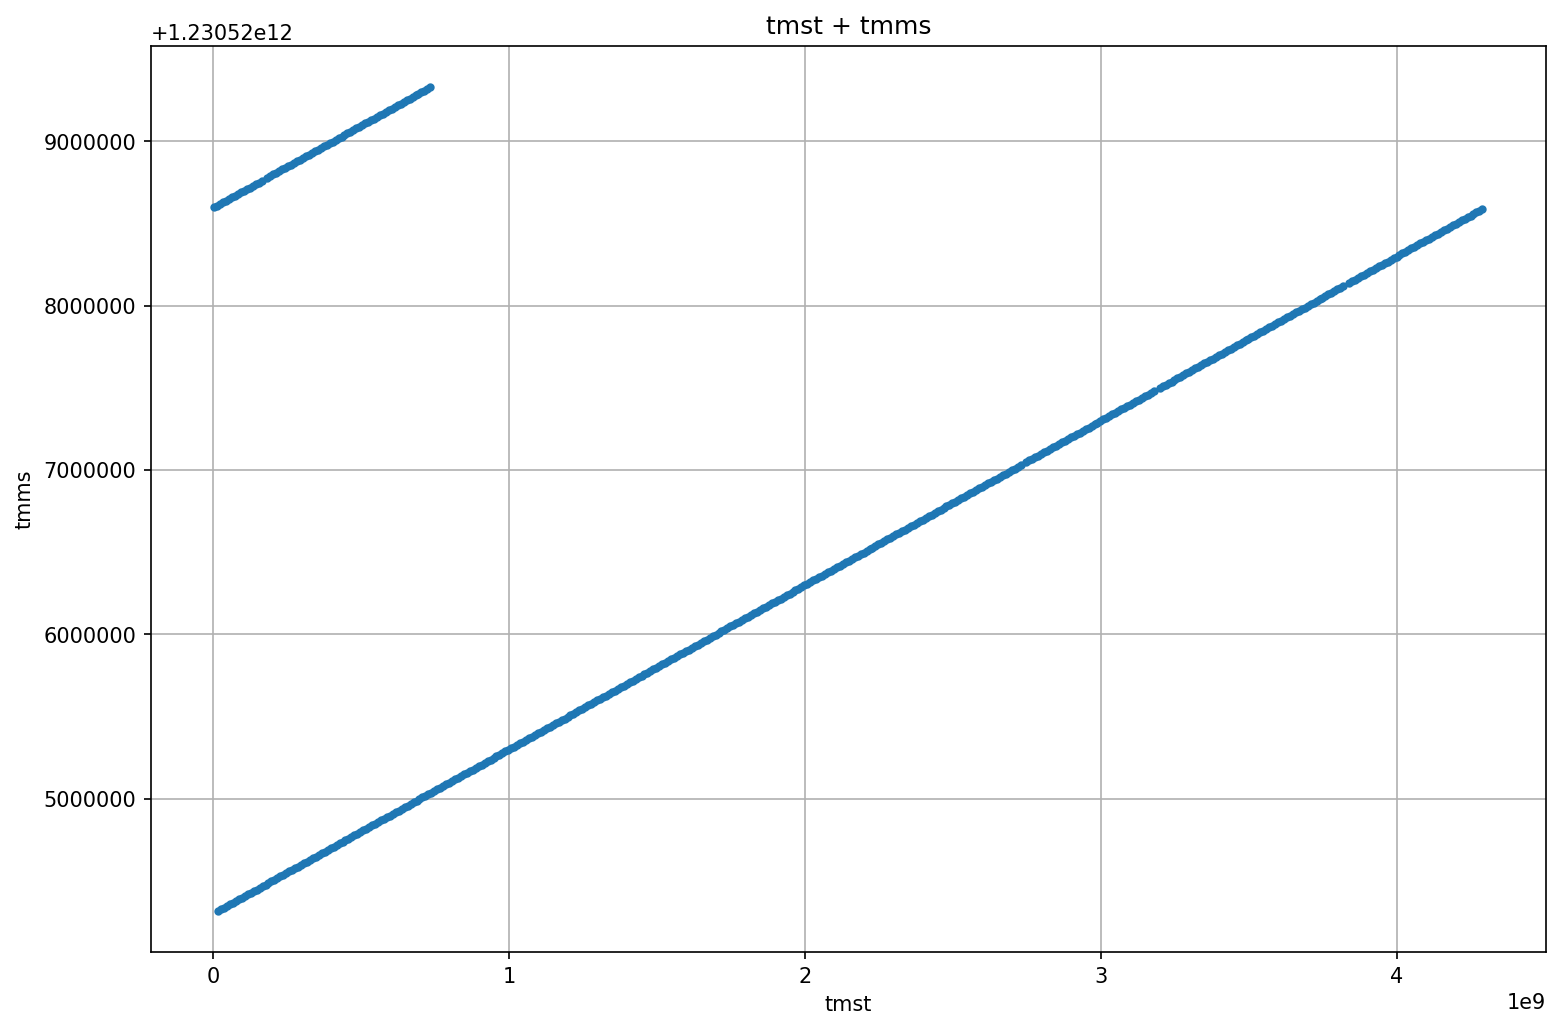

tmst为X tmms为Y
avr slop = 0.001
max slop = 0.0010001079361018276
min slop = 0.000999928826419633
最坏情况下，每秒同步一次造成的误差如下
对 tmms 的影响为0.10793610182762217 ms/ -0.0711735803670191 ms

去除异常点后，采样数量百分比 = 99.79879275653923%


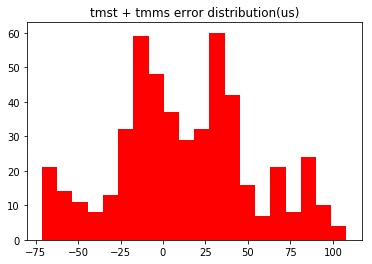

<Figure size 1440x960 with 0 Axes>

In [107]:
compare(gw_tmst, gw_tmms, "tmst", "tmms")

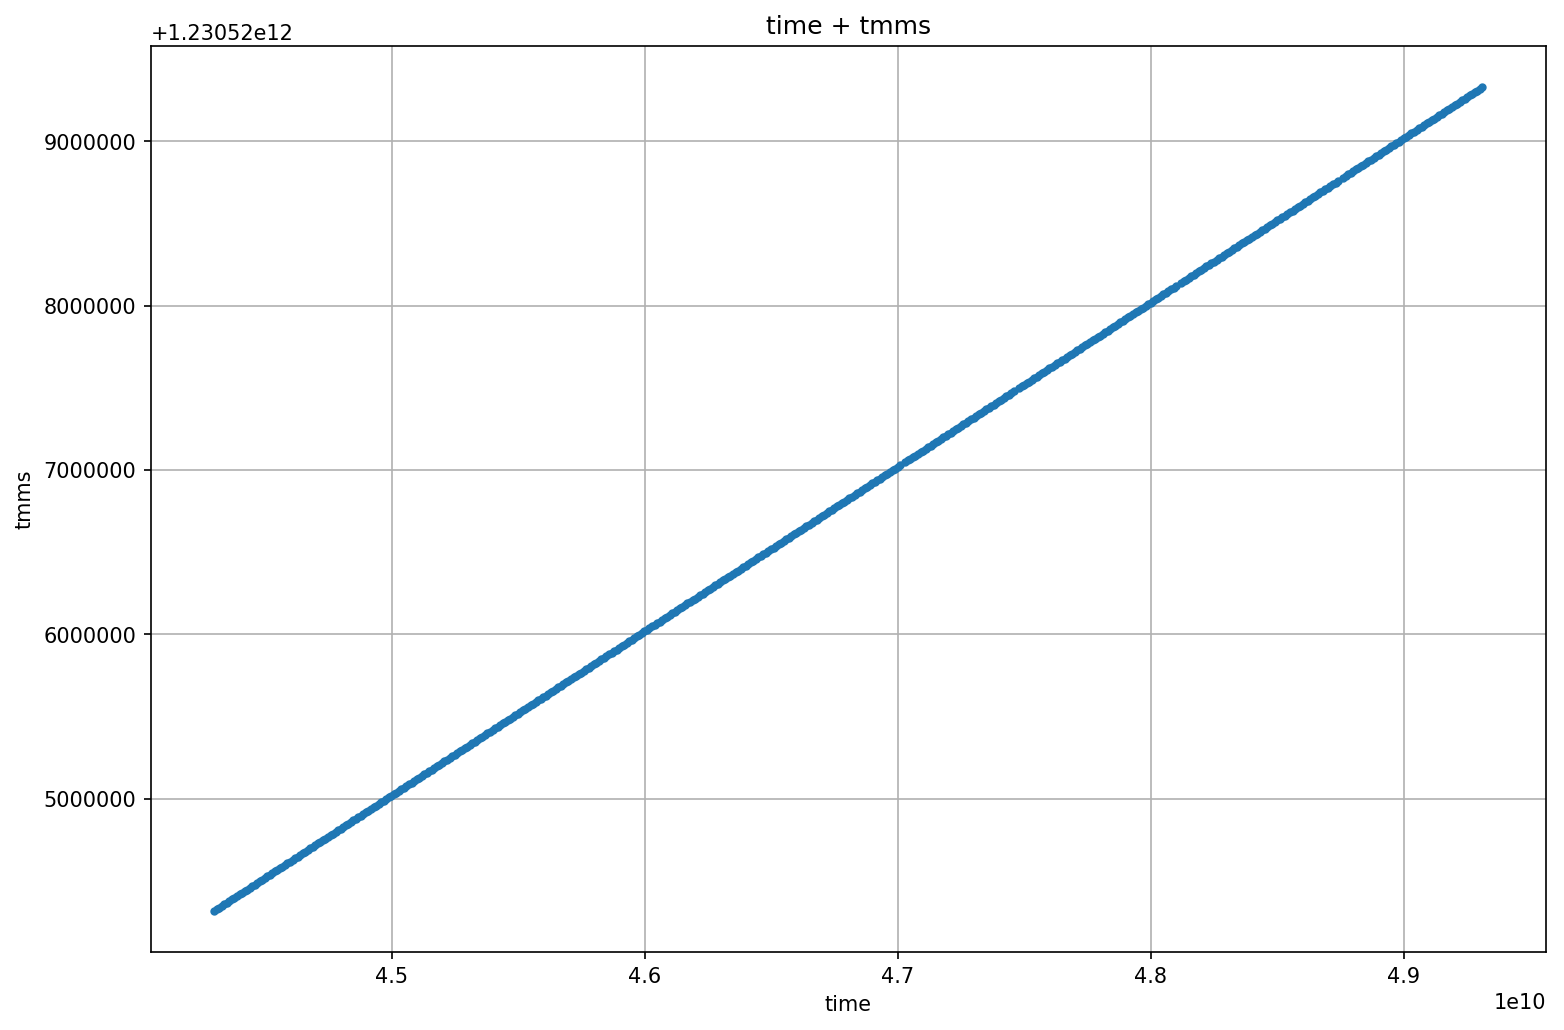

time为X tmms为Y
avr slop = 0.001
max slop = 0.001097600077575732
min slop = 0.0009508011485639861
最坏情况下，每秒同步一次造成的误差如下
对 tmms 的影响为97.60007757573207 ms/ -49.198851436013896 ms

去除异常点后，采样数量百分比 = 90.94567404426559%


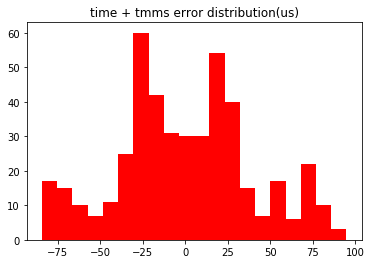

<Figure size 1440x960 with 0 Axes>

In [108]:
compare(gw_time, gw_tmms, "time", "tmms")